# Опиши алгоритм работы с временными рядами для построения модели прогнозирования ряда

Алгоритм работы с временными рядами для построения модели прогнозирования включает несколько этапов, начиная с обработки данных и заканчивая валидацией модели. Вот основные шаги:

 1. **Сбор и анализ данных**
   - **Сбор данных**: Необходимо собрать временные ряды, где данные представляют собой последовательность наблюдений во времени (например, дневные, еженедельные или ежемесячные данные).
   - **Первичный анализ данных**: Визуализировать временной ряд для изучения его структуры. Определить наличие тренда, сезонности, выбросов и аномалий.

 2. **Проверка на стационарность**
   - **Определение стационарности**: Проверить, стационарен ли временной ряд, т.е. имеют ли его статистические свойства (среднее, дисперсия) постоянные значения с течением времени.
     - Использовать тесты, такие как тест Дикки-Фуллера (ADF), чтобы проверить гипотезу о стационарности.
     - Если ряд не стационарен, можно применить дифференцирование, чтобы удалить тренд.

3. **Удаление тренда и сезонности**
   - **Тренд**: Если тренд выражен, его можно удалить с помощью дифференцирования ряда (например, использовать разность первого порядка).
   - **Сезонность**: Если сезонность имеет мультипликативный характер, можно трансформировать данные (например, применить логарифмирование) или использовать сезонные модели (например, SARIMA).

 4. **Выбор и трансформация признаков**
   - **Лаговые признаки**: Для авторегрессионных моделей создаются лаговые переменные, т.е. предсказания зависят от предыдущих наблюдений (например, \( y_t = f(y_{t-1}, y_{t-2}, \dots) \)).
   - **Сезонные признаки**: Можно добавить сезонные индикаторы (месяц, день недели и т.д.).
   - **Другие внешние признаки**: Возможно, на временной ряд влияют дополнительные факторы (внешние переменные, такие как экономические индикаторы, погода и т.д.), их также нужно включить в модель.

 5. **Разделение данных на тренировочные и тестовые выборки**
   - Важно разделить временные ряды на тренировочные и тестовые части с учетом временной оси, чтобы избежать утечки данных. Обычно тестовые данные идут последними во временной последовательности.

 6. **Построение модели**
   - **Простые модели**:
     - **Модель скользящего среднего (MA)**: Предсказывает будущее значение на основе среднего предыдущих наблюдений.
     - **Авторегрессионная модель (AR)**: Предсказывает текущее значение на основе предыдущих значений ряда.
     - **ARIMA** (авторегрессионная интегрированная модель скользящего среднего): Комбинирует авторегрессию и скользящее среднее с интегрированием, чтобы учесть стационарность.
     - **SARIMA**: Расширение ARIMA для учета сезонных факторов.
   - **Продвинутые модели**:
     - **Рекуррентные нейронные сети (RNN, LSTM, GRU)**: Модели глубокого обучения, которые способны учитывать долгосрочные зависимости.
     - **Градиентный бустинг (например, XGBoost)**: Используется для моделирования временных рядов, особенно если данные имеют множество признаков и не только временную компоненту.

 7. **Подбор гиперпараметров**
   - Для моделей, таких как ARIMA или SARIMA, необходимо выбрать параметры \(p\), \(d\), и \(q\) (авторегрессионный порядок, степень интегрирования и порядок скользящего среднего). Это можно сделать с помощью автоматических методов (например, `auto_arima`) или путем перебора с кросс-валидацией.
   - Для моделей машинного обучения важно подобрать гиперпараметры с помощью методов вроде `GridSearch` или `RandomizedSearch`.

 8. **Оценка модели**
   - **Метрики качества**: Для оценки модели использовать метрики прогноза, такие как:
     - **MAE (Mean Absolute Error)** — средняя абсолютная ошибка.
     - **RMSE (Root Mean Squared Error)** — среднеквадратичная ошибка.
     - **MAPE (Mean Absolute Percentage Error)** — средняя абсолютная процентная ошибка.
   - **Кросс-валидация**: Для временных рядов стандартная кросс-валидация не подходит, поэтому используется метод **Time Series Cross-Validation**, где данные не перемешиваются, а разбиения учитывают временную структуру.

 9. **Прогнозирование и интерпретация результатов**
   - **Прогнозирование**: После тренировки модели можно сделать прогноз на будущее. Прогноз может быть точечным или интервальным (например, с доверительным интервалом).
   - **Интерпретация**: Важно уметь объяснить бизнес-задачи и то, как модельные прогнозы могут повлиять на принятие решений (например, в финансах, ритейле, производстве).

 10. **Мониторинг модели**
   - **Мониторинг в продакшене**: После внедрения модели важно следить за её качеством. С течением времени временные ряды могут меняться (например, из-за изменения тренда или сезонности), и модель может нуждаться в переобучении.
   - **Выявление дрейфа данных**: Необходимо проверять, не смещаются ли распределения данных, чтобы модель оставалась актуальной.

 Пример применения:

1. Собираем данные о продажах за последние 3 года.
2. Проверяем стационарность — ряд не стационарен, делаем дифференцирование.
3. Определяем тренд и сезонность (например, выявляем сезонные пики в продажах летом).
4. Выбираем модель SARIMA для учета сезонных колебаний и прогнозируем продажи на следующие месяцы.
5. Оцениваем качество прогнозов с помощью RMSE и кросс-валидации.

Следуя этому алгоритму, можно построить модель для прогнозирования временных рядов, которая будет учитывать важные аспекты временных зависимостей и специфики данных.

# Что такое временной ряд? Какие есть примеры временных рядов?

**Временной ряд** — это последовательность наблюдений или измерений, выполненных через равные интервалы времени. Важно, что эти данные упорядочены по времени, и каждое значение связано с определенным моментом или периодом времени.

Примеры временных рядов:
- Экономические данные: Курсы валют, уровень инфляции, ВВП по кварталам.
- Финансовые данные: Цены акций, объём торгов на бирже, процентные ставки.
- Метеорологические данные: Ежедневная температура, уровень осадков, скорость ветра.
- Производственные данные: Ежедневные объемы производства, потребление электроэнергии.
- Здравоохранение: Ежедневное количество заболевших или выздоровевших пациентов.
- Веб-аналитика: Количество посещений сайта или покупок на сайте по дням или часам.

# Чем временные ряды отличаются от обычных данных?

Временные ряды отличаются от обычных данных тем, что они упорядочены по времени и каждое наблюдение зависит от предыдущих и последующих точек. Это приводит к тому, что временные ряды могут содержать временные зависимости, такие как тренды, сезонность или циклические изменения. Обычные данные (независимые наблюдения) не зависят от порядка и рассматриваются как независимые выборки.

Особенности временных рядов:

- Зависимость во времени: Наблюдения в ряду часто зависят друг от друга (автокорреляция).
- Тренд: Может быть восходящий или нисходящий долгосрочный тренд.
- Сезонность: Периодические колебания, которые повторяются через фиксированные интервалы времени.
- Цикличность: Колебания, не зависящие от фиксированного временного интервала, как в случае с сезонностью.
- Необходимость учета времени: Для временных рядов анализ должен учитывать временные зависимости.

# Что такое стационарность? Как проверить, стационарен ли временной ряд?

Стационарность временного ряда означает, что его статистические свойства (среднее, дисперсия и ковариация) не меняются с течением времени. То есть, временной ряд стационарен, если он не имеет выраженного тренда, сезонности или каких-либо других долгосрочных изменений.

**Признаки стационарного ряда:**
- Постоянное среднее значение на всём протяжении ряда.
- Постоянная дисперсия (разброс значений) с течением времени.
- Автокорреляция зависит только от временного лага, а не от времени наблюдений.

**Методы проверки стационарности**:
- Визуализация: Построение графика временного ряда. Если ряд показывает явные тренды или сезонные колебания, он, скорее всего, не стационарен.

Статистические тесты:

- Тест Дики-Фуллера (Augmented Dickey-Fuller Test, ADF): Проверяет гипотезу о наличии единичного корня в ряду (что свидетельствует о нестационарности). Если p-value теста меньше заданного уровня значимости (например, 0.05), гипотеза о нестационарности отвергается, и ряд считается стационарным.
- KPSS-тест (Kwiatkowski-Phillips-Schmidt-Shin): Противоположный тест, проверяет гипотезу о стационарности ряда.

Преобразование к стационарности:

- Дифференцирование: Удаление тренда или сезонности путём взятия разностей последовательных значений временного ряда.
- Логарифмирование или другие нелинейные трансформации: Применяется для уменьшения экспоненциального роста или сильных флуктуаций.

# Что такое автокорреляция и частичная автокорреляция?


**Автокорреляция** — это мера зависимости временного ряда от его предыдущих значений. Иными словами, она измеряет, насколько текущее значение временного ряда связано с предыдущими значениями на определённом временном лаге.

Например, если значения временного ряда сильно зависят от значений, которые были неделю назад, автокорреляция на лаге 7 дней будет высокой.

Автокорреляцию можно измерить с помощью автокорреляционной функции (ACF), которая показывает зависимость между значениями ряда на разных лагах (временных отрезках).

**Частичная автокорреляция:**
Частичная автокорреляция измеряет корреляцию между значением временного ряда и его значением на лаге k, при условии, что эффект всех промежуточных лагов был учтён.

Частичная автокорреляционная функция (PACF) помогает определить истинную зависимость между значениями ряда на определённом временном лаге, исключая влияние промежуточных лагов.

Пример: если мы хотим узнать, как текущее значение связано со значением двумя шагами назад (лаг 2), PACF позволит это сделать, устранив влияние лага 1.

Заключение:
Автокорреляция показывает общие зависимости на всех лагах, а частичная автокорреляция — только на конкретном лаге, исключая влияние других.

#  Какие существуют методы обработки пропущенных данных в временных рядах?

Пропущенные данные — распространённая проблема при работе с временными рядами. Чтобы эффективно справляться с пропусками, можно использовать несколько методов:

1. Удаление пропущенных значений:
Удаление строк: Самый простой способ — удалить все наблюдения с пропусками, но это может привести к потере важной информации.
2. Интерполяция:
Линейная интерполяция: Восстановление пропущенных значений с помощью линейной интерполяции между соседними точками.
Полиномиальная интерполяция: Использование полиномиальной функции для интерполяции, что позволяет учесть более сложные зависимости.
Сплайновая интерполяция: Более гибкий метод интерполяции, который лучше подходит для восстановления пропусков при наличии нелинейных зависимостей.
3. Заполнение средним значением:
Среднее по окну: Пропущенное значение можно заменить на среднее из соседних наблюдений в скользящем окне (например, среднее за последние 5 дней).
4. Экстраполяция с помощью модели:
ARIMA, Exponential Smoothing: Можно обучить модель на известных данных и использовать её для предсказания пропущенных значений.
5. Пропагирование соседних значений:
Методы forward-fill и backward-fill: Пропущенные значения заполняются предыдущими или последующими значениями. Этот метод подходит, если значения остаются стабильными в течение определённых периодов.
6. Пространственные методы (если есть дополнительные признаки):
Использование регрессии или других методов машинного обучения, чтобы предсказать пропущенные значения на основе других признаков, связанных с временным рядом.

# Что такое тренд, сезонность и остаточная компонента? Как их можно выявить?


**Тренд** — это долгосрочная направленность временного ряда, которая может быть восходящей (рост) или нисходящей (падение). Тренд отражает общее изменение временного ряда с течением времени.
Пример: Постепенное увеличение объёмов продаж компании за несколько лет.

**Сезонность** — это повторяющиеся колебания временного ряда с фиксированным периодом (например, дневные, ежемесячные, годовые циклы). Сезонные эффекты часто связаны с календарными событиями или циклами в бизнесе.
Пример: Рост спроса на подарки в декабре из-за новогодних праздников.

**Остаточная компонента (шум):**
Остаточная компонента — это случайные колебания, которые не объясняются трендом или сезонностью. Она может включать шум или нерегулярные изменения.
Пример: Аномалии в продажах из-за неожиданных событий, таких как акции или праздники.

Выявление компонентов:
- Декомпозиция временного ряда:
- Модели, такие как STL (Seasonal-Trend Decomposition using LOESS), позволяют разделить временной ряд на три компоненты: тренд, сезонность и остаток.
- Визуализация: Декомпозиция позволяет визуально увидеть тренд и сезонность после удаления случайных колебаний

# Как нестационарный ряд привести к стационарному?

Приведение нестационарного временного ряда к стационарному — это важный этап при работе с временными рядами, так как многие модели прогнозирования, такие как ARIMA, требуют стационарности данных. Для этого применяются различные техники. Рассмотрим основные методы, которые помогают достичь стационарности временного ряда.

1. **Дифференцирование**

**Дифференцирование** — это самый распространённый метод приведения ряда к стационарности. Оно заключается в вычислении разностей между последовательными значениями временного ряда. 

- **Первое дифференцирование**: Это разность между текущим и предыдущим значением.
  \[
  Y'(t) = Y(t) - Y(t-1)
  \]
  Применяется для устранения линейного тренда.

- **Второе дифференцирование**: Если первое дифференцирование не приводит ряд к стационарности, можно применить второе дифференцирование, т.е. вычислить разности между значениями первого дифференцирования.
  \[
  Y''(t) = Y'(t) - Y'(t-1)
  \]

- Пример: если временной ряд имеет возрастающий тренд, применение дифференцирования помогает избавиться от этого тренда, оставляя более стационарный ряд.

 2. **Удаление тренда**

Для устранения долгосрочного тренда можно применить методы удаления тренда. Это помогает, если данные содержат регулярные повышения или понижения.

- **Регрессия по времени**: Можно построить линейную регрессию, чтобы смоделировать тренд, и затем вычесть её из исходных данных. Например, если тренд линейный, можно подогнать прямую к данным и удалить её.
  \[
  Y_{\text{детренд}}(t) = Y(t) - \hat{T}(t)
  \]
  где \(\hat{T}(t)\) — модель тренда (например, линейная).

- **Скользящее среднее**: Вычисление скользящего среднего и его вычитание из исходного ряда также может помочь сгладить тренд.

 3. **Удаление сезонности**

Если ряд содержит сезонные компоненты, они могут нарушать стационарность. Сезонные колебания можно устранить несколькими способами.

- **Сезонное дифференцирование**: Применяется, если временной ряд имеет регулярные повторяющиеся сезонные компоненты. Вычисляются разности между значениями через \(s\) периодов, где \(s\) — это длина сезонного цикла.
  \[
  Y_{\text{сез.}}'(t) = Y(t) - Y(t-s)
  \]
  Этот метод помогает избавиться от сезонных колебаний.

- **Модели декомпозиции**: Модели, такие как **STL-декомпозиция (Seasonal-Trend decomposition using LOESS)**, могут использоваться для выделения и удаления сезонных компонентов.

 4. **Логарифмирование**

**Логарифмирование** помогает стабилизировать дисперсию в данных. Это особенно полезно, если амплитуда колебаний увеличивается с ростом временного ряда. Логарифмическая трансформация уменьшает влияние больших значений, делая данные более стационарными.

- Логарифмирование применяется ко всем значениям ряда:

- Пример: логарифмирование полезно при работе с временными рядами, где значения быстро растут или где амплитуда сезонных колебаний увеличивается.

 5. **Боксово-Коксово преобразование**

**Преобразование Бокса-Кокса** используется для стабилизации дисперсии и приведения данных к более нормальному распределению. Это обобщённая версия логарифмирования, которая включает параметр \(\lambda\), управляющий степенью преобразования.

 6. **Проверка на стационарность**

После применения одной или нескольких техник следует проверить, стал ли ряд стационарным. Для этого можно использовать:

- **Тест Дики-Фуллера (ADF)**: Проверяет наличие единичного корня в ряду (признак нестационарности). Если p-value теста меньше 0.05, ряд считается стационарным.
- **KPSS-тест**: Проверяет гипотезу о стационарности ряда. Если p-value больше 0.05, ряд можно считать стационарным.

 Пример работы с временным рядом:

1. **Исходный ряд**: Временной ряд имеет возрастающий тренд и увеличивающуюся сезонную амплитуду.
2. **Логарифмирование**: Уменьшаем амплитуду колебаний.
3. **Дифференцирование**: Применяем дифференцирование для удаления тренда.
4. **Сезонное дифференцирование**: Применяем сезонное дифференцирование для устранения сезонности.
5. **Проверка на стационарность**: Применяем тест Дики-Фуллера.

**Заключение**

Приведение временного ряда к стационарному часто требует комбинирования различных методов, таких как дифференцирование, логарифмирование и декомпозиция. Эти методы помогают удалить тренды, сезонность и стабилизировать дисперсию, что делает временной ряд более пригодным для прогнозирования с использованием моделей.

# Как работать с с нестационарным рядом, если нет возможности сделать его стационарным?

Если временной ряд является нестационарным, и нет возможности привести его к стационарности, можно использовать несколько подходов и методов, которые не требуют обязательной стационарности ряда для построения прогностических моделей. Рассмотрим основные подходы для работы с нестационарными временными рядами:

 1. **Модели для нестационарных временных рядов**

- **SARIMA (Seasonal ARIMA)**
   - **SARIMA** — это расширенная версия модели ARIMA, которая учитывает сезонные компоненты и может обрабатывать нестационарные ряды за счёт сезонного и обычного дифференцирования.
   - SARIMA позволяет работать с временными рядами, которые имеют как тренд, так и сезонные колебания, даже если они нестационарны.
   - **Преимущества**: Эффективно справляется с сезонными временными рядами, даже если они не стационарны.

-  **SARIMAX (Seasonal ARIMA with eXogenous variables)**
   - **SARIMAX** — это ещё одна модификация ARIMA, которая поддерживает экзогенные переменные (дополнительные факторы). Эти переменные могут помочь объяснить нестационарность, если она вызвана внешними факторами.
   - Если нестационарность ряда вызвана внешними экономическими показателями, погодными условиями и т. д., их можно добавить в модель в качестве экзогенных переменных.

-  **Prophet**
   - **Facebook Prophet** — это модель прогнозирования, специально разработанная для обработки сложных нестационарных временных рядов с сильным трендом и сезонностью. Prophet автоматически настраивает модель под данные и не требует стационарности.
   - Она хорошо справляется с рядами, где есть непостоянная сезонность, праздники, тренды или аномальные выбросы.
   - **Преимущества**: Простота настройки, подходит для работы с разреженными или неполными временными рядами.

 **Exponential Smoothing (ETS)**
   - **Экспоненциальное сглаживание** — это набор методов, таких как **Holt-Winters**, которые эффективно справляются с нестационарными рядами, содержащими тренд и сезонность.
   - **ETS** модели работают с прогнозированием трендов и сезонности без необходимости приводить данные к стационарности.

- **LSTM и GRU (рекуррентные нейронные сети)**
   - **LSTM (Long Short-Term Memory)** и **GRU (Gated Recurrent Unit)** — это архитектуры нейронных сетей, которые могут эффективно справляться с нестационарными временными рядами, обучаясь на сложных паттернах, даже если данные содержат тренд и сезонность.
   - Эти модели хорошо обрабатывают последовательности и не требуют предварительной стационарности данных.
   - **Преимущества**: Могут автоматически выявлять долгосрочные зависимости и тренды, что делает их полезными для работы с нестационарными временными рядами.

 2. **Использование регрессии с временными рядами**

- **Модели с переменными регрессии**
   - Если нестационарность временного ряда вызвана внешними факторами (например, макроэкономическими показателями, погодными условиями и т.д.), можно использовать регрессионные модели, такие как **линейная регрессия**, для прогнозирования. В этом случае внешний фактор может объяснить нестационарность.
   - **Пример**: Прогнозирование спроса на электричество с учётом температуры. Необходимо учитывать, что модель может не потребовать стационарности, если внешний фактор достаточно силён для объяснения тренда или сезонности.

- **Модели с экзогенными переменными (XGBoost, LightGBM)**
   - **XGBoost** и **LightGBM** — это мощные алгоритмы градиентного бустинга, которые могут работать с временными рядами и не требуют приведения данных к стационарности.
   - Эти модели позволяют учитывать как временные метки, так и дополнительные переменные (например, внешние факторы или календарные данные), которые могут помочь объяснить нестационарность.
   - **Преимущества**: Эти модели могут автоматически обрабатывать сложные зависимости и строить прогнозы без жёсткого требования к стационарности данных.

3. **Интегрированные модели**

-  **Коинтеграция**
   - Если существует несколько нестационарных временных рядов, можно проверить, не являются ли они **коинтегрированными**. Коинтеграция означает, что хотя каждый из рядов по отдельности нестационарен, их линейная комбинация может быть стационарной.
   - Для выявления коинтеграции используется тест **Йохансена** или **тест Энгла-Грейнджера**.
   - **Пример**: Два временных ряда, таких как цены на нефть и стоимость акций нефтяных компаний, могут быть коинтегрированы.

- **Векторная авторегрессия (VAR)**
   - Модель **VAR** используется для анализа и прогнозирования нескольких взаимосвязанных временных рядов. Она может работать с нестационарными данными, если эти ряды коинтегрированы.
   - **Пример**: Прогнозирование макроэкономических показателей, таких как инфляция и безработица, которые могут быть нестационарными, но связаны друг с другом.

- **Декомпозиция временного ряда и моделирование компонентов отдельно**

Если временной ряд нестационарен, его можно разложить на составляющие (тренд, сезонность и остаточную компоненту), а затем моделировать каждую компоненту отдельно:

- **Тренд**: Можно смоделировать с помощью регрессии или любой другой модели для временных рядов.
- **Сезонность**: Можно смоделировать с помощью сезонного компонента или специализированных методов.
- **Остаток**: После удаления тренда и сезонности, можно моделировать оставшиеся случайные колебания.

4. **Гибридные подходы**

В некоторых случаях для работы с нестационарными рядами используют гибридные модели, которые сочетают методы. Например:

- **Сочетание ARIMA и LSTM**: ARIMA может использоваться для моделирования линейных компонентов (тренд, сезонность), а LSTM для улавливания сложных нелинейных зависимостей.
- **Гибридные модели машинного обучения**: Сочетание классических методов временных рядов и нейронных сетей может улучшить прогноз для сложных нестационарных данных.

**Заключение**

Работа с нестационарными временными рядами без приведения их к стационарности возможна благодаря использованию специализированных моделей, таких как SARIMA, Prophet, LSTM, или гибридных подходов. Экзогенные переменные, коинтеграция и декомпозиция также могут быть полезными при работе с нестационарными данными. Эти методы позволяют эффективно моделировать и прогнозировать временные ряды, даже если они остаются нестационарными.

# Как выявить и обработать выбросы во временных рядах?

- Визуализация данных:
Графики: Построение временных графиков или диаграмм размаха (box plots) позволяет визуально определить аномальные значения.

- Использование статистического правила трех сигм: если значение выходит за пределы 
μ±3σ (где μ — среднее значение, σ — стандартное отклонение), его можно считать выбросом

- Межквартильный размах (IQR): Если значение выходит за пределы Q1-1.5IQR или Q3+1.5IQR, где Q1 и Q3 — первый и третий квартили, соответственно, а IQR — межквартильный размах, то оно может быть выбросом.

-  Методы машинного обучения:
Использование моделей для выявления выбросов, таких как Isolation Forest, One-Class SVM или LOF (Local Outlier Factor).




# Какие методы можно использовать для обнаружения аномалий (например, методы статистики, машинного обучения)?

1. Методы статистики:
- Z-оценка: Позволяет выявить выбросы, сравнивая значения с распределением. Обычно, если Z-оценка превышает 3 (или 2.5), это говорит о выброс
- Метод скользящего окна: Сравнение текущих значений с усредненным значением и стандартным отклонением в скользящем окне позволяет выявлять локальные аномалии


2. Машинное обучение:
- Isolation Forest: Алгоритм, специально разработанный для выявления выбросов. Он строит дерево решений, разделяя данные на основе случайных подмножеств, и выбросы оказываются слабо связанными с основным распределением.

- One-Class SVM: Модель SVM для выявления выбросов. Она обучается на нормальных данных и пытается отделить их от аномалий.

- Autoencoders (Автокодировщики): Нейронные сети могут быть обучены на "нормальных" данных для восстановления исходного ряда. Аномалии обнаруживаются, если восстановление не удается (высокая ошибка реконструкции).



# Пример задачи из моей работы с временными рядами. Как вы решали эту задачу?

Один из примеров — это прогнозирование клиентского спроса для оптимизации закупок. Основной задачей было прогнозирование объема заказов, что позволяло минимизировать издержки на хранение и повысить оборачиваемость товаров.

**Проблема:**
- Временной ряд содержал много пропусков и выбросов.
- Сезонность зависела от множества внешних факторов, таких как праздники и скидочные кампании.
- Необходимость адаптации к изменениям спроса в течение года.

**Решение:**
Обработка пропущенных данных и выбросов:

Пропуски заполнялись с использованием линейной интерполяции и моделей на основе ближайших соседей (KNN). Выбросы устранялись с помощью медианного фильтра и визуального анализа.

**Декомпозиция временного ряда:**

Временной ряд был декомпозирован на тренд, сезонную и остаточную компоненты. Это позволило лучше понять долгосрочные и краткосрочные факторы, влияющие на спрос.

**Моделирование:**

Для моделирования использовалась комбинация моделей: SARIMA для прогнозирования сезонной составляющей и XGBoost для учета дополнительных факторов (цены, акции, макроэкономические показатели).
SARIMA хорошо справлялась с прогнозированием цикличных данных, а XGBoost учитывал временные внешние факторы.

**Оценка и интерпретация:**

Мы использовали метрики MAPE и RMSE для оценки точности прогноза. Важно было не только точность, но и объяснимость результатов для бизнес-руководителей.
Результаты прогнозов позволили оптимизировать закупки, сократив издержки на 12% за год и повысив оборачиваемость складов.
Адаптация к изменениям:

Модель была настроена на регулярное обновление раз в неделю с использованием новых данных. Мы также внедрили механизм мониторинга "drift", чтобы своевременно пересматривать модель при изменении трендов.
Этот подход позволил повысить точность прогнозов, что напрямую отразилось на эффективности бизнес-решений.

#  Что такое автоэнкодер? Как работает данная архитектура?

Автоэнкодер — это нейросетевая архитектура, предназначенная для обучения сжатых (или латентных) представлений данных в виде кода с минимальной потерей информации. Его основная задача — сжать входные данные в более компактное представление (код) и затем восстановить оригинальные данные из этого кода.

**Архитектура автоэнкодера**

Автоэнкодер состоит из двух основных частей:
1. **Энкодер (Encoder)** — это часть, которая сжимает входные данные до латентного представления.
2. **Декодер (Decoder)** — это часть, которая восстанавливает оригинальные данные из латентного представления.

**Детали архитектуры:**

1. **Входной слой**:
   Входные данные X подаются в сеть. Это могут быть любые данные: изображения, тексты, сигналы и т.д.

2. **Энкодер**:
   Энкодер — это набор слоёв нейросети, которые постепенно уменьшают размерность входных данных. 
   - Обычно используется несколько слоёв полносвязных или свёрточных нейронов (в случае работы с изображениями), которые сжимают информацию до более компактного латентного вектора z.
   - Процесс можно описать как  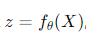  — это функция, определяемая параметрами (весами) сети, которая кодирует данные.

3. **Латентное пространство**:
   В этом слое данные представлены в компактной форме — это сжатое представление данных, называемое кодом. Размерность этого представления меньше, чем у исходных данных. Этот код содержит наиболее важную информацию, необходимую для восстановления данных.

4. **Декодер**:
   Декодер — это набор слоёв нейросети, которые постепенно увеличивают размерность сжатого представления z до исходного размера данных.
   - Декодер пытается восстановить оригинальные данные из латентного вектора \( z \).
   - Процесс восстановления можно описать как 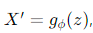, где g — это функция декодера, которая преобразует код обратно в исходные данные.

5. **Выходной слой**:
   Выход X` — это реконструкция исходных данных X. Цель сети — минимизировать разницу между оригиналом X и его восстановленной версией 
   (X`). 

**Обучение автоэнкодера**

Автоэнкодер обучается путём минимизации ошибки реконструкции между входными данными и восстановленными данными. Обычно это делается с использованием функции потерь, такой как среднеквадратичная ошибка (MSE):

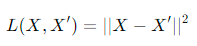

**Пример работы автоэнкодера:**
1. **Сжатие данных**: Входные данные X (например, изображение) проходят через энкодер, который сжимает их в код (например, вектор меньшей размерности).
2. **Восстановление данных**: Этот код передаётся через декодер, который пытается восстановить исходное изображение.
3. **Обучение**: Если восстановленное изображение X` сильно отличается от оригинального, то веса в сети обновляются так, чтобы улучшить качество восстановления на следующих итерациях.

**Типы автоэнкодеров**

1. **Классический автоэнкодер** — обучает сжатое представление данных без явных ограничений на латентное пространство.
2. **Шумоподавляющий автоэнкодер (Denoising Autoencoder)** — обучается на данных с шумом, при этом декодер должен восстанавливать оригинальные данные без шума.
3. **Вариационный автоэнкодер (Variational Autoencoder, VAE)** — латентное пространство в VAE моделируется распределением, и его цель — не только сжать данные, но и обучить вероятностное представление этого сжатого пространства. Это позволяет генерировать новые данные путем семплирования из латентного распределения.
4. **Спарс-автоэнкодер (Sparse Autoencoder)** — в латентном векторе большинство значений принудительно обнуляются (вводится регуляризация на разреженность), что помогает выявить важные признаки данных.

**Применение автоэнкодеров**

- **Сжатие данных**: Автоэнкодеры могут использоваться для сжатия данных без сильной потери качества.
- **Уменьшение размерности**: Можно использовать автоэнкодеры для уменьшения размерности данных, аналогично методу главных компонент (PCA), но в нелинейной форме.
- **Шумоподавление**: Автоэнкодеры могут обучаться на шумных данных и восстанавливать оригинальные данные, что полезно для фильтрации шума.
- **Генерация новых данных**: Вариационные автоэнкодеры могут создавать новые примеры данных, подобные исходным, что делает их полезными для задач генерации изображений и текстов.

Автоэнкодеры — это мощный инструмент для обучения сжатых представлений данных и их последующего восстановления, который находит применение в задачах сжатия, генерации и реконструкции данных.

# Как применять автоэнкодер во временном ряду?

**Автоэнкодер** — это тип нейронной сети, предназначенный для обучения сжатого представления (кодировки) входных данных. Он состоит из двух основных частей:
1. **Энкодер**: сжимает входные данные до низкоразмерного латентного пространства (кодировки).
2. **Декодер**: восстанавливает данные из этого латентного представления, пытаясь максимально приблизить восстановленные данные к исходным.

Цель автоэнкодера — научиться эффективной компрессии данных, сохраняя их наиболее важные характеристики. 

Архитектура автоэнкодера:
- **Входные данные**: Временной ряд или набор признаков.
- **Энкодер**: Понижает размерность входных данных, извлекая наиболее важную информацию.
- **Латентное пространство**: Сжатое представление, которое содержит основные особенности входных данных.
- **Декодер**: Восстанавливает данные из латентного представления.
- **Выход**: Попытка воссоздать оригинальные входные данные.

Использование автоэнкодеров для временных рядов:

Автоэнкодеры можно эффективно использовать для анализа временных рядов, особенно в следующих задачах:

1. **Обнаружение аномалий**:
   - Обучение автоэнкодера на "нормальных" данных временных рядов позволяет модели понять типичные паттерны в данных.
   - Если модель не может хорошо восстановить входные данные (например, при большой ошибке восстановления), это может указывать на аномалии.
   - Пример: Для временного ряда финансовых транзакций автоэнкодер может использоваться для выявления подозрительных операций, которые модель не может корректно восстановить.

2. **Снижение размерности временных рядов**:
   - Автоэнкодеры могут использоваться для сжатия высокоразмерных временных рядов в более компактные представления. Это полезно, когда нужно сохранить ключевые особенности данных, при этом уменьшив их размерность.
   - Пример: Если у вас есть набор временных рядов с множеством признаков (например, данные от датчиков), автоэнкодер может сжать их до менее размерного представления для дальнейшего анализа.

3. **Реконструкция данных**:
   - Автоэнкодеры можно использовать для восстановления недостающих данных или шумовых данных. Модель учится восстанавливать исходный временной ряд из повреждённых данных.
   - Пример: Если в временном ряде есть пропуски или ошибки, автоэнкодер может быть обучен на исправных данных и использоваться для восстановления недостающих точек.

4. **Прогнозирование**:
   - Автоэнкодеры могут быть частью более сложных моделей прогнозирования временных рядов, которые используют сжатое латентное пространство для предсказания будущих значений.
   - Пример: Энкодер сжимает исторические данные временного ряда, а декодер используется для предсказания будущих значений на основе сжатого представления.


Применение автоэнкодеров для временных рядов:

- **Обнаружение аномалий**: Модель обучается восстанавливать нормальные данные. Для аномальных данных ошибка восстановления будет значительно выше.
- **Сжатие данных**: Латентное представление может использоваться для визуализации или как вход для других моделей.
- **Реконструкция и очистка данных**: Если временной ряд содержит пропуски или шум, автоэнкодер может помочь восстановить истинные данные.

Преимущества автоэнкодеров для временных рядов:
- Способность моделировать сложные нелинейные зависимости.
- Возможность сжимать данные, что полезно при работе с большими наборами временных рядов.
- Подходит для задач обнаружения аномалий, где требуется выявить неожиданные отклонения в данных.

Таким образом, автоэнкодеры — это мощный инструмент для анализа временных рядов, особенно в контексте обнаружения аномалий, сжатия данных и восстановления недостающих значений.

# Расскажи как использовать автоэнкодер для решения задачи выявления аномалий во временном ряду?

Автоэнкодеры можно эффективно использовать для выявления аномалий во временных рядах, поскольку они обучаются восстанавливать нормальные данные, но могут плохо восстанавливать аномальные. Принцип работы основан на том, что автоэнкодер будет пытаться сжать и восстановить временной ряд, обучаясь на нормальных данных. Если данные содержат аномалию, автоэнкодер, как правило, не сможет качественно её восстановить, что даст высокий уровень ошибки восстановления, что и является признаком аномалии.

Автоэнкодеры можно эффективно использовать для выявления аномалий во временных рядах, поскольку они обучаются восстанавливать нормальные данные, но могут плохо восстанавливать аномальные. Принцип работы основан на том, что автоэнкодер будет пытаться сжать и восстановить временной ряд, обучаясь на нормальных данных. Если данные содержат аномалию, автоэнкодер, как правило, не сможет качественно её восстановить, что даст высокий уровень ошибки восстановления, что и является признаком аномалии.

**Шаги использования автоэнкодера для обнаружения аномалий во временных рядах:**

1. **Сбор и подготовка данных**:
   - **Сбор временного ряда**: Соберите временной ряд, который представляет наблюдения во времени (например, показания датчиков, временные метрики бизнеса и т.д.).
   - **Создание окон данных**: Для использования временного ряда в автоэнкодере его нужно разделить на окна фиксированной длины. Каждое окно представляет собой временной отрезок данных. Например, если временной ряд состоит из данных , можно создать окна длиной w, например, , и так далее.

2. **Построение модели автоэнкодера**:
   - **Энкодер**: Это часть автоэнкодера, которая принимает на вход окно временного ряда и сжимает его в латентное представление меньшей размерности.
     - Обычно используются полносвязные или свёрточные слои для обработки временных данных, либо рекуррентные нейронные сети (RNN, LSTM, GRU), которые хорошо справляются с временными зависимостями.
   - **Декодер**: Он восстанавливает сжатое представление обратно в исходное окно временного ряда, стараясь минимизировать разницу между исходным и восстановленным сигналом.
     - Структура декодера зеркально противоположна энкодеру.

3. **Обучение автоэнкодера**:
   - **Обучение на нормальных данных**: Автоэнкодер обучается на данных, которые не содержат аномалий. Его цель — минимизировать ошибку восстановления между оригинальными данными и восстановленными. Функцией потерь может быть среднеквадратичная ошибка (MSE):
   
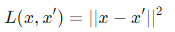

     где x — оригинальное окно данных, а x` — восстановленное автоэнкодером.
   - После обучения автоэнкодер научится эффективно сжимать и восстанавливать **нормальные** данные.

4. **Выявление аномалий**:
   - **Предсказание**: После обучения автоэнкодер начинает обрабатывать новые данные, в том числе те, которые могут содержать аномалии. Для каждого окна временного ряда он предсказывает восстановленное окно x`.
   - **Ошибка восстановления**: Для каждого окна вычисляется ошибка восстановления. Если ошибка (x - x`)велика (превышает порог, определённый на этапе обучения), то это может свидетельствовать о том, что данное окно содержит аномальные данные.
   - **Выбор порога ошибки**: Порог ошибки можно установить на основе статистики ошибок восстановления на нормальных данных. Например, можно использовать статистику отклонений, такие как среднее значение ошибки восстановления и её стандартное отклонение, и установить порог как u + 3σ (трёхсигмовое правило).

5. **Анализ и интерпретация результатов**:
   - Для каждого временного окна с ошибкой, превышающей порог, можно отметить данные как аномальные.
   - Вы также можете визуализировать ошибку восстановления по времени и смотреть на всплески в ошибках, которые будут соответствовать аномалиям.



**Преимущества автоэнкодеров для обнаружения аномалий:**
1. **Обучение без учителя**: Автоэнкодеры могут обучаться без меток, что удобно для задач, где метки аномалий недоступны.
2. **Хорошо работают на временных рядах**: Благодаря способности кодировать временные зависимости, они могут эффективно моделировать нормальное поведение данных.
3. **Гибкость архитектуры**: Для временных данных можно использовать разные типы слоёв, такие как LSTM, GRU, или свёрточные слои (для временных данных в форме изображений).

**Недостатки и вызовы:**
1. **Нужен хороший баланс данных**: Если в тренировочных данных присутствуют аномалии, автоэнкодер может научиться их восстанавливать, что сделает его менее чувствительным к аномалиям.
2. **Настройка порога**: Выбор порога ошибки восстановления — это важный и сложный шаг, так как неправильный выбор может привести к ложным срабатываниям или пропуску аномалий.

Таким образом, автоэнкодеры предоставляют мощный инструмент для обнаружения аномалий во временных рядах, особенно когда данные нелинейные и имеют сложные временные зависимости.